In [25]:
import numpy as np
import matplotlib.pyplot as plt
from AE import tsize
from AE import AE_dft_int_fps_int, AE_dft_ext_fps_int

In [26]:
c_dft_int_fps_int = np.polyfit(tsize, np.log10(AE_dft_int_fps_int), 1)
c_dft_ext_fps_int = np.polyfit(tsize, np.log10(AE_dft_ext_fps_int), 1)

f_dft_int_fps_int = c_dft_int_fps_int[0]*np.asarray(tsize) + c_dft_int_fps_int[1]
f_dft_ext_fps_int = c_dft_ext_fps_int[0]*np.asarray(tsize) + c_dft_ext_fps_int[1]

In [27]:
# linear lines
print(f'K_int: {c_dft_int_fps_int}')
print(f'K_ext: {c_dft_ext_fps_int}')
print(f'Gray line: {np.mean((c_dft_int_fps_int, c_dft_ext_fps_int), axis=0)}')

K_int: [-0.64970172  1.39011808]
K_ext: [-0.66609447  1.37242815]
Gray line: [-0.65789809  1.38127311]


([<matplotlib.axis.YTick at 0x7fea4e4c8450>,
 [Text(0, -1.0, '0.1'),
  Text(0, -0.6989700043360187, ''),
  Text(0, -0.5228787452803376, ''),
  Text(0, -0.3979400086720376, ''),
  Text(0, -0.3010299956639812, ''),
  Text(0, -0.22184874961635637, ''),
  Text(0, -0.1549019599857432, ''),
  Text(0, -0.09691001300805639, ''),
  Text(0, -0.045757490560675115, ''),
  Text(0, 0.0, '1.0'),
  Text(0, 0.3010299956639812, ''),
  Text(0, 0.47712125471966244, ''),
  Text(0, 0.6020599913279624, ''),
  Text(0, 0.6989700043360189, ''),
  Text(0, 0.7781512503836436, ''),
  Text(0, 0.8450980400142568, ''),
  Text(0, 0.9030899869919435, ''),
  Text(0, 0.9542425094393249, ''),
  Text(0, 1.0, '10.0')])

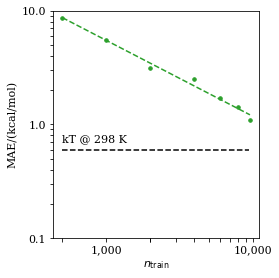

In [31]:
# Data for the gray line 
c_plot = np.array([-0.65789809,  1.38127311])
s_plot= np.log10([400, 12000])
f_plot = c_plot[0]*s_plot + c_plot[1]

# Figure style
fig = plt.figure(figsize=(4, 4))
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['font.family'] = 'serif'
ms = 7

# Plot
ax = fig.add_subplot(111)

kcalpmol = 23.060541945329334

# Gray line
#ax.plot(s_plot, f_plot, ls='-', c='gray', lw=0.75)

# Kint with FPS int
#ax.plot(tsize, f_dft_int_fps_int, ls='--', c='crimson')
#ax.plot(tsize, np.log10(AE_dft_int_fps_int), 'o', color='crimson', label=r'K$_\mathrm{int}$@DFT', ms=ms)

# Kext with FPS ext
ax.plot(tsize, np.log10(kcalpmol)+f_dft_ext_fps_int, ls='--', c='tab:green')
ax.plot(tsize, np.log10(kcalpmol*np.array(AE_dft_ext_fps_int)), '.', color='tab:green', label=r'K$_\mathrm{ext}$@DFT', ms=ms)

# Labels
ax.set_xlabel(r'$n_\mathrm{train}$')
ax.set_ylabel(r'MAE/(kcal/mol)')
ax.set_ylim(np.log10(0.1), np.log10(10))
#ax.set_title('FPS int', fontsize=12)

#ax.text(np.log10(750), np.log10(0.37), '$K_\mathrm{int}$')
#ax.text(np.log10(2000), np.log10(0.1), '$K_\mathrm{ext}$')

ax.plot(np.log10([500,9500]), [np.log10(0.593), np.log10(0.593)], "k--")

ax.text(np.log10(500), np.log10(0.7), 'kT @ 298 K')

# Set the correct ticks in log style 
plt.xticks(
    [2.69897,  3.,  np.log10(2000), np.log10(2000), np.log10(3000), np.log10(4000), np.log10(5000), np.log10(6000), np.log10(7000), np.log10(8000), np.log10(9000), 4.0], 
    ['',  '1,000',  '', '', '', '', '', '', '', '', '', '10,000']
)
plt.yticks([
    np.log10(0.1),
    np.log10(0.2),
    np.log10(0.3),
    np.log10(0.4),
    np.log10(0.5),
    np.log10(0.6),
    np.log10(0.7),
    np.log10(0.8),
    np.log10(0.9),
    np.log10(1),
    np.log10(2),
    np.log10(3),
    np.log10(4),
    np.log10(5),
    np.log10(6),
    np.log10(7),
    np.log10(8),
    np.log10(9),
    np.log10(10),
 ], [
    '0.1', '', '','','','','','','',
     '1.0','','','','','','','','',
    '10.0']
)

In [32]:
fig.savefig('rad6.pdf')